# Proyek Analisis Data: Beijing Air Quality (PRSA 2013-2017)
- **Nama:** Mohamamd 'Alwan Fauzi
- **Email:** alwanfauzi111@gmail.com
- **ID Dicoding:** alwanfauzi

**Definisi PM2.5:**
PM2.5 adalah konsentrasi partikel udara berukuran sangat kecil (diameter 2,5 mikrometer) yang tersuspensi di udara.
Di dataset ini, PM2.5 direkam sebagai kadar partikel per jam di tiap stasiun pengukuran.

## Menentukan Pertanyaan Bisnis

- Stasiun mana yang memiliki rata-rata PM2.5 tertinggi, dan bagaimana perbandingan antar stasiun?
- Bagaimana pola musiman PM2.5 (rata-rata bulanan) sepanjang tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style='whitegrid')

## Data Wrangling

### Gathering Data

In [2]:
data_dir = Path("dataset")
files = sorted(data_dir.glob("*.csv"))
dfs = [pd.read_csv(f) for f in files]
raw_df = pd.concat(dfs, ignore_index=True)
raw_df.shape

(420768, 18)

**Insight (objek: dataset PRSA 12 stasiun):**
- Objek yang dianalisis adalah 12 file dataset stasiun kualitas udara dengan skema kolom yang konsisten.
- Total baris data gabungan berjumlah 420.768 sebelum pembersihan.

### Assessing Data

In [3]:
raw_df.info()
raw_df.isna().sum().sort_values(ascending=False).head(10)
raw_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


np.int64(0)

**Insight (objek: missing values pada kolom polutan):**
- Objek yang paling banyak missing adalah CO (20.701), O3 (13.277), NO2 (12.116), dan SO2 (9.021).
- Objek duplikasi baris pada data mentah tidak ditemukan.

### Cleaning Data

In [4]:
df = raw_df.copy()
numeric_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["wd"] = df["wd"].fillna("Unknown")
df["RAIN"] = df["RAIN"].fillna(0)
df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])

df = df.dropna(subset=["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "WSPM"])
df = df.drop_duplicates()
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


**Insight (objek: dataset hasil cleaning):**
- Setelah pembersihan, objek data yang dianalisis menyisakan 383.589 baris.
- Objek waktu dibentuk sebagai kolom `datetime`, dan objek curah hujan kosong diisi 0.

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
df.describe()

pm25_by_station = df.groupby("station")["PM2.5"].mean().sort_values(ascending=False)
pm25_by_station

station
Dongsi           84.980103
Nongzhanguan     84.746745
Wanshouxigong    84.273432
Gucheng          83.949539
Guanyuan         83.122160
Wanliu           81.990923
Aotizhongxin     81.883436
Tiantan          81.767192
Shunyi           79.960686
Huairou          70.436117
Changping        70.424568
Dingling         66.618086
Name: PM2.5, dtype: float64

**Insight (objek: rata-rata PM2.5 per stasiun):**
- Rata-rata PM2.5 pada dataset ini adalah nilai mean konsentrasi PM2.5 per jam untuk setiap stasiun sepanjang 2013-2017 setelah pembersihan data.
- Objek stasiun dengan rata-rata PM2.5 tertinggi adalah Dongsi (84,98), Nongzhanguan (84,75), dan Wanshouxigong (84,27).
- Objek stasiun dengan rata-rata PM2.5 terendah adalah Dingling (66,62), Changping (70,42), dan Huairou (70,44).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Stasiun mana yang memiliki rata-rata PM2.5 tertinggi?

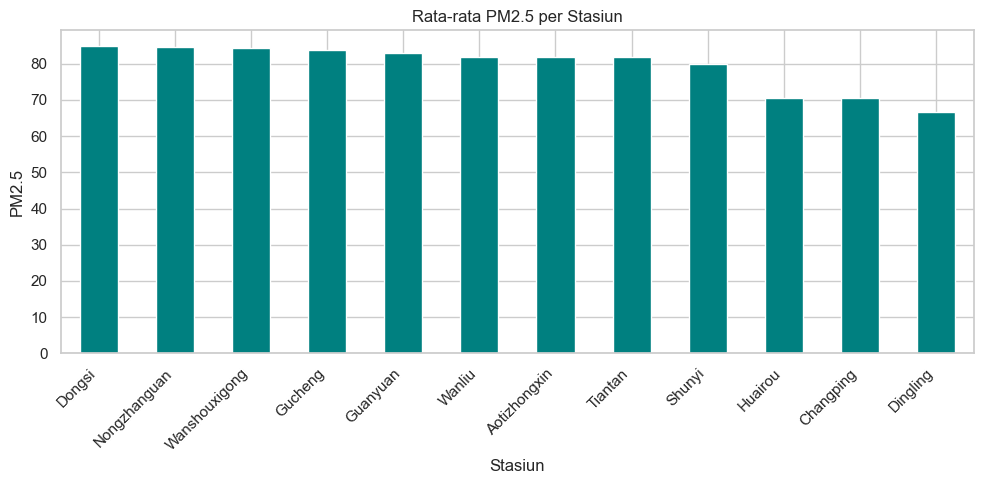

In [6]:
plt.figure(figsize=(10, 5))
pm25_by_station.plot(kind="bar", color="teal")
plt.title("Rata-rata PM2.5 per Stasiun")
plt.ylabel("PM2.5")
plt.xlabel("Stasiun")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

### Pertanyaan 2: Bagaimana pola musiman PM2.5 sepanjang tahun?

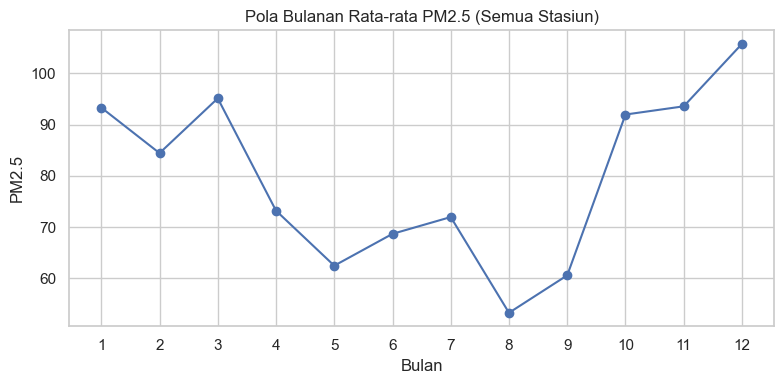

In [7]:
df["month"] = df["datetime"].dt.month
monthly_pm25 = df.groupby("month")["PM2.5"].mean()

plt.figure(figsize=(8, 4))
monthly_pm25.plot(marker="o")
plt.title("Pola Bulanan Rata-rata PM2.5 (Semua Stasiun)")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.xticks(range(1, 13))
plt.tight_layout()

**Insight (objek: kategori polusi dan pola bulanan PM2.5):**
- Objek stasiun dengan proporsi kategori polusi berat tertinggi adalah Dongsi, Wanshouxigong, dan Gucheng.
- Objek bulan dengan rata-rata PM2.5 tertinggi adalah Desember (105,72) dan terendah adalah Agustus (53,31).

## Analisis Lanjutan (Opsional)

C:\Users\Alwan\AppData\Local\Temp\ipykernel_14148\4034823590.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["season", "pm25_level"])


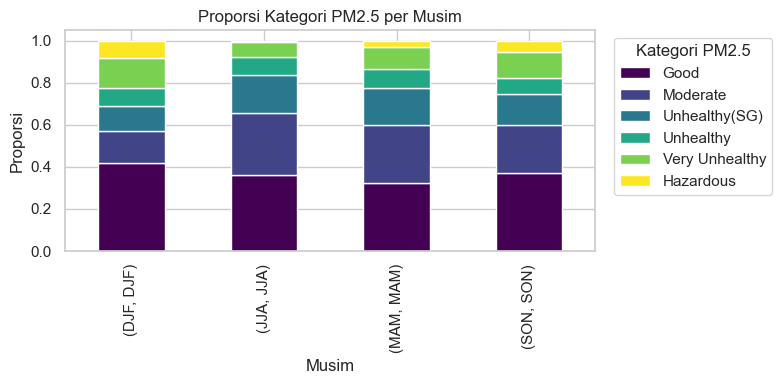

In [8]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return "DJF"
    if month in [3, 4, 5]:
        return "MAM"
    if month in [6, 7, 8]:
        return "JJA"
    return "SON"

df["season"] = df["month"].map(month_to_season)
bins = [0, 35, 75, 115, 150, 250, 500]
labels = ["Good", "Moderate", "Unhealthy(SG)", "Unhealthy", "Very Unhealthy", "Hazardous"]
df["pm25_level"] = pd.cut(df["PM2.5"], bins=bins, labels=labels, right=False)

season_dist = (
    df.dropna(subset=["pm25_level"])
      .groupby(["season", "pm25_level"])
      .size()
      .groupby(level=0)
      .apply(lambda x: x / x.sum())
      .unstack()
)
season_dist

season_dist.plot(kind="bar", stacked=True, figsize=(8, 4), colormap="viridis")
plt.title("Proporsi Kategori PM2.5 per Musim")
plt.xlabel("Musim")
plt.ylabel("Proporsi")
plt.legend(title="Kategori PM2.5", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()

## Menyimpan Dataset untuk Dashboard

In [9]:
from pathlib import Path

dashboard_dir = Path("dashboard")
dashboard_dir.mkdir(exist_ok=True)

cols = ["datetime", "year", "month", "season", "station",
        "PM2.5", "PM10", "SO2", "NO2", "CO", "O3",
        "TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM"]

df[cols].to_csv(dashboard_dir / "main_data.csv", index=False)
df[cols].head()

,datetime,year,month,season,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013-03-01 00:00:00,2013,3,MAM,Aotizhongxin,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013-03-01 01:00:00,2013,3,MAM,Aotizhongxin,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013-03-01 02:00:00,2013,3,MAM,Aotizhongxin,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013-03-01 03:00:00,2013,3,MAM,Aotizhongxin,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013-03-01 04:00:00,2013,3,MAM,Aotizhongxin,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


## Conclusion

- Objek stasiun prioritas pemantauan adalah Dongsi, Nongzhanguan, dan Wanshouxigong karena rata-rata PM2.5 tertinggi, dengan Dongsi paling sering berada di kategori polusi berat.
- Objek waktu prioritas mitigasi adalah bulan Desember (puncak PM2.5) dan Agustus (terendah), dengan variasi pola antar stasiun.